# Base Code

Epoch 1/20
1250/1250 [==============================] - 10s 6ms/step - loss: 1.8866 - accuracy: 0.3097 - val_loss: 1.7241 - val_accuracy: 0.3809
Epoch 2/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.6965 - accuracy: 0.3870 - val_loss: 1.6850 - val_accuracy: 0.4007
Epoch 3/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.6083 - accuracy: 0.4215 - val_loss: 1.6116 - val_accuracy: 0.4175
Epoch 4/20
1250/1250 [==============================] - 6s 4ms/step - loss: 1.5574 - accuracy: 0.4439 - val_loss: 1.6268 - val_accuracy: 0.4259
Epoch 5/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.5137 - accuracy: 0.4582 - val_loss: 1.5790 - val_accuracy: 0.4362
Epoch 6/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.4837 - accuracy: 0.4660 - val_loss: 1.5797 - val_accuracy: 0.4350
Epoch 7/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.4557 - accuracy: 0.4756 - val_loss: 1.5141 - val_accuracy

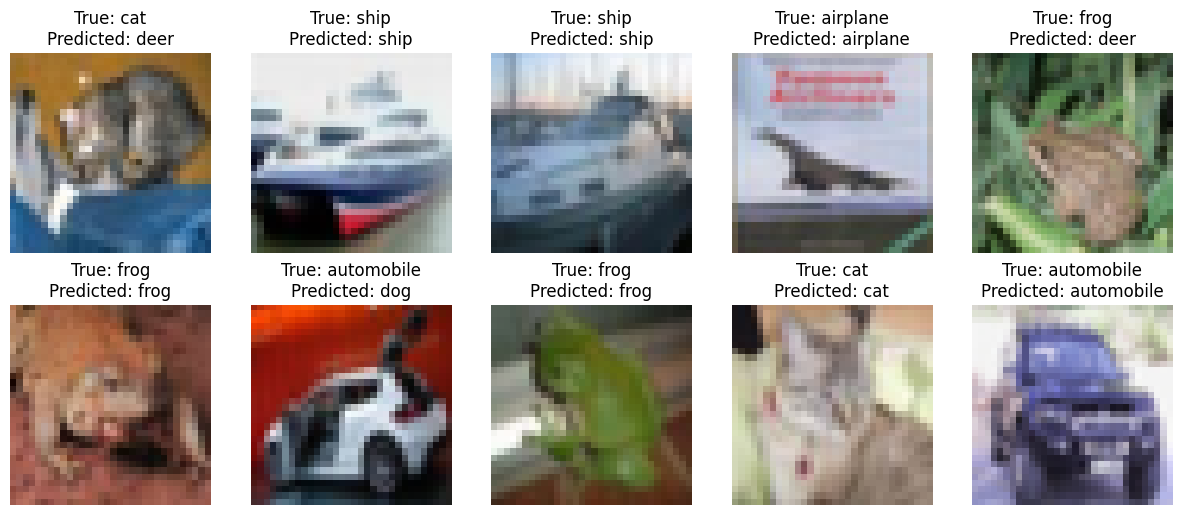

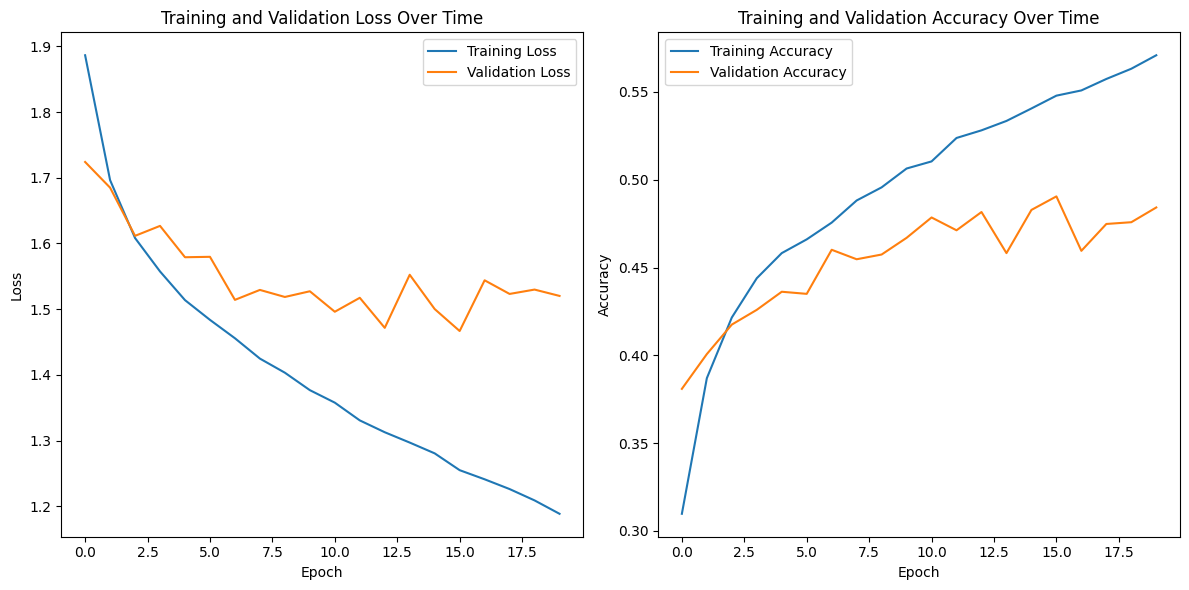

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from tensorflow.keras import datasets, layers, models


# Step 1: Data Preparation
(train_images, train_labels), (test_images,
                               test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

# Step 2: Initialize the Neural Network
model = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Step 3: Compile the Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Step 4: Training
history = model.fit(train_images, train_labels,
                    epochs=20, batch_size=32, validation_split=0.2)

# Step 5: Testing
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")

# Step 6: Printing Results
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
predictions = model.predict(test_images)
plt.figure(figsize=(15, 6))  # Adjust the figsize as needed
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(test_images[i])
    plt.title(f"True: {class_names[test_labels[i][0]]}\nPredicted:
                      {class_names[np.argmax(predictions[i])]}")
    plt.axis("off")
plt.show()

# Step 5: Plotting Graphs
plt.figure(figsize=(12, 6))
# Plot Training Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy Over Time')
# Plot Training Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss Over Time')
plt.tight_layout()  # Ensures proper spacing between subplots
plt.show()

# Xavier Initialization with Regularization, and Dropout

Epoch 1/20
1250/1250 [==============================] - 8s 5ms/step - loss: 3.3554 - accuracy: 0.1422 - val_loss: 2.2302 - val_accuracy: 0.1736
Epoch 2/20
1250/1250 [==============================] - 6s 5ms/step - loss: 2.2467 - accuracy: 0.1499 - val_loss: 2.1768 - val_accuracy: 0.1781
Epoch 3/20
1250/1250 [==============================] - 6s 5ms/step - loss: 2.2360 - accuracy: 0.1528 - val_loss: 2.1892 - val_accuracy: 0.1783
Epoch 4/20
1250/1250 [==============================] - 6s 5ms/step - loss: 2.2334 - accuracy: 0.1542 - val_loss: 2.1892 - val_accuracy: 0.1690
Epoch 5/20
1250/1250 [==============================] - 7s 5ms/step - loss: 2.2383 - accuracy: 0.1503 - val_loss: 2.1906 - val_accuracy: 0.1889
Epoch 6/20
1250/1250 [==============================] - 5s 4ms/step - loss: 2.2366 - accuracy: 0.1503 - val_loss: 2.1655 - val_accuracy: 0.1844
Epoch 7/20
1250/1250 [==============================] - 6s 4ms/step - loss: 2.2326 - accuracy: 0.1519 - val_loss: 2.2032 - val_accuracy:

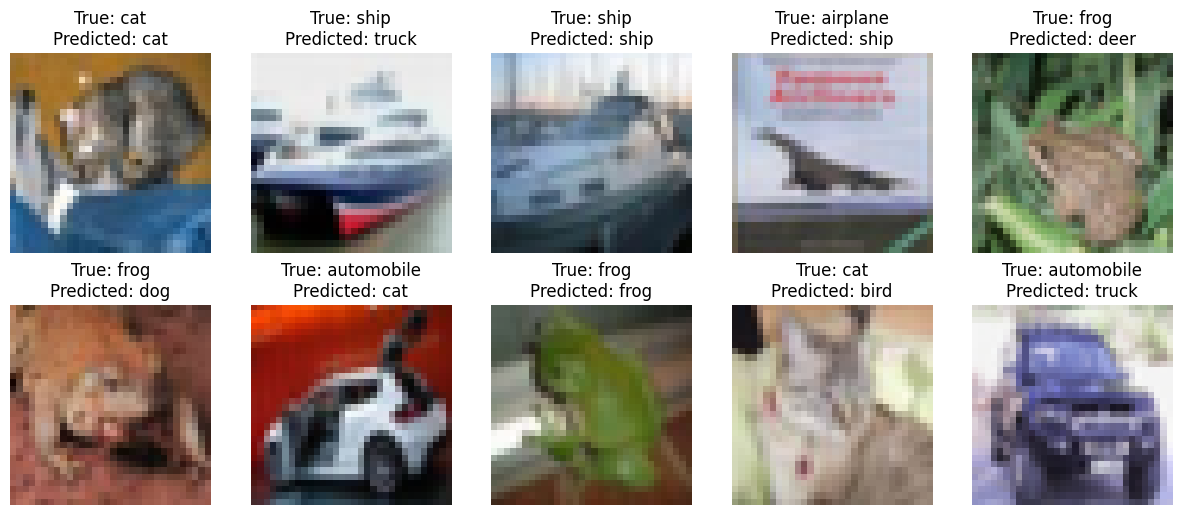

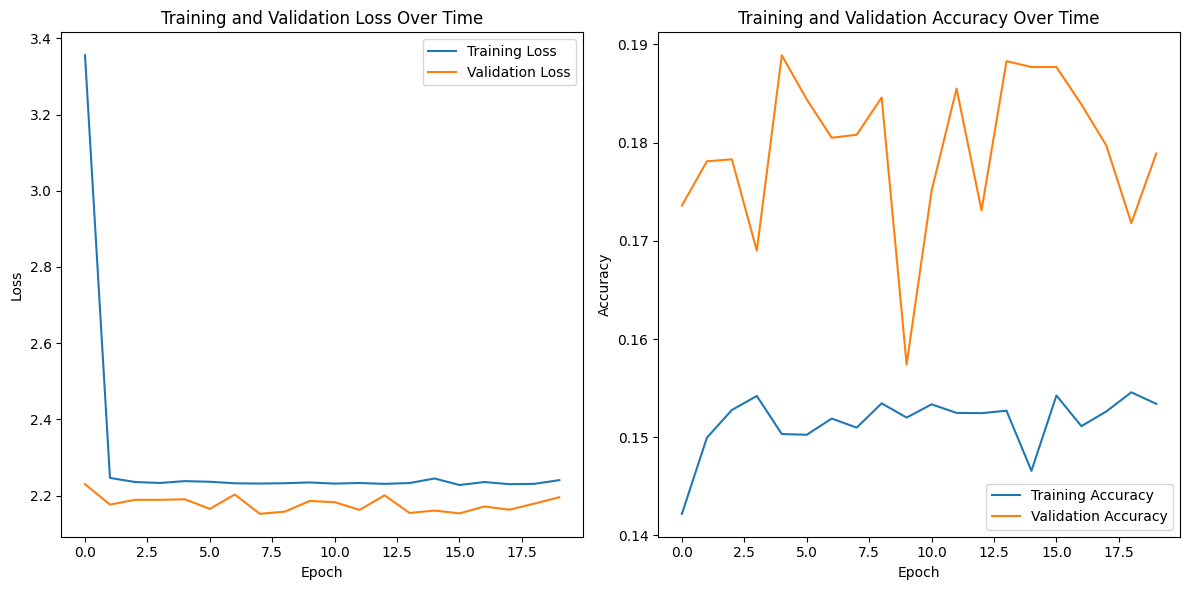

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, regularizers

# Step 1: Data Preparation
(train_images, train_labels), (test_images,
                               test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

# Step 2: Initialize the Network with Xavier Initialization, L2, and Dropout
model_xavier = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(512, activation='relu', kernel_initializer='glorot_uniform',
                 kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.5),
    layers.Dense(256, activation='relu', kernel_initializer='glorot_uniform',
                 kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu', kernel_initializer='glorot_uniform',
                 kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax', kernel_initializer='glorot_uniform',
                 kernel_regularizer=regularizers.l2(0.01))
])

# Step 3: Compile the Model
model_xavier.compile(optimizer='adam',
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])

# Step 4: Training
history_xavier = model_xavier.fit(train_images, train_labels,
                                  epochs=20, batch_size=32, validation_split=0.2)

# Step 5: Testing
test_loss_xavier, test_acc_xavier = model_xavier.evaluate(test_images, test_labels)
print(f"Xavier Initialization - Test accuracy: {test_acc_xavier}")

# Step 6: Printing Results
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
predictions = model.predict(test_images)
plt.figure(figsize=(15, 6))  # Adjust the figsize as needed
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(test_images[i])
    plt.title(f"True: {class_names[test_labels[i][0]]}\nPredicted:
                      {class_names[np.argmax(predictions[i])]}")
    plt.axis("off")
plt.show()

# Step 5: Plotting Graphs
plt.figure(figsize=(12, 6))
# Plot Training Accuracy
plt.subplot(1, 2, 2)
plt.plot(history_xavier.history['accuracy'], label='Training Accuracy')
plt.plot(history_xavier.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy Over Time')
# Plot Training Loss
plt.subplot(1, 2, 1)
plt.plot(history_xavier.history['loss'], label='Training Loss')
plt.plot(history_xavier.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss Over Time')
plt.tight_layout()  # Ensures proper spacing between subplots
plt.show()

# Kaiming Initialization with Regularization, and Dropout

Epoch 1/20
1250/1250 [==============================] - 9s 6ms/step - loss: 4.2628 - accuracy: 0.1421 - val_loss: 2.2974 - val_accuracy: 0.1685
Epoch 2/20
1250/1250 [==============================] - 6s 5ms/step - loss: 2.2566 - accuracy: 0.1550 - val_loss: 2.1949 - val_accuracy: 0.1702
Epoch 3/20
1250/1250 [==============================] - 6s 5ms/step - loss: 2.2391 - accuracy: 0.1559 - val_loss: 2.1935 - val_accuracy: 0.1830
Epoch 4/20
1250/1250 [==============================] - 5s 4ms/step - loss: 2.2374 - accuracy: 0.1524 - val_loss: 2.1953 - val_accuracy: 0.1778
Epoch 5/20
1250/1250 [==============================] - 7s 5ms/step - loss: 2.2389 - accuracy: 0.1528 - val_loss: 2.1948 - val_accuracy: 0.1764
Epoch 6/20
1250/1250 [==============================] - 6s 5ms/step - loss: 2.2383 - accuracy: 0.1541 - val_loss: 2.2239 - val_accuracy: 0.1632
Epoch 7/20
1250/1250 [==============================] - 7s 5ms/step - loss: 2.2425 - accuracy: 0.1572 - val_loss: 2.1836 - val_accuracy:

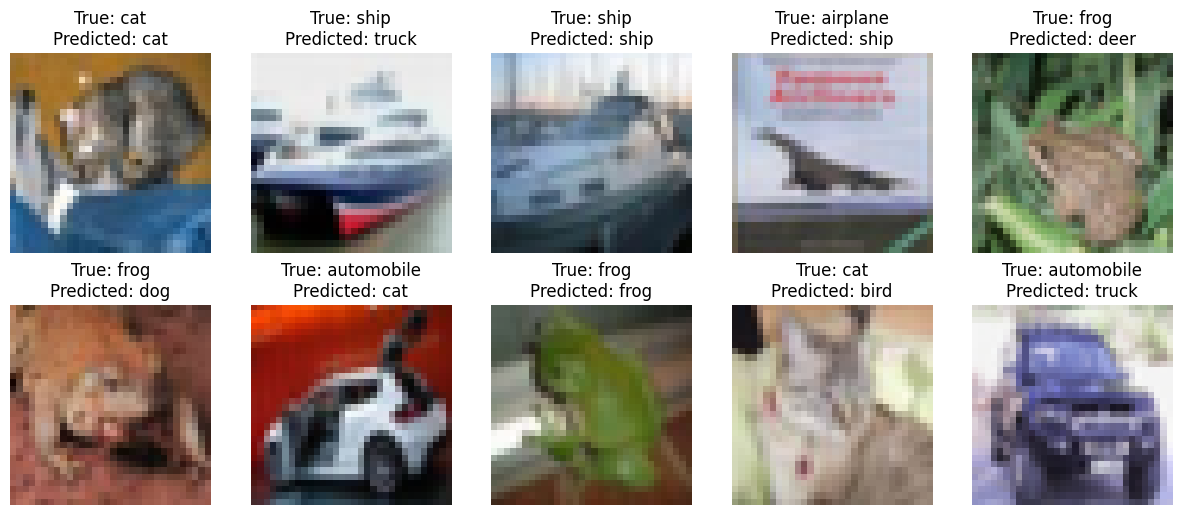

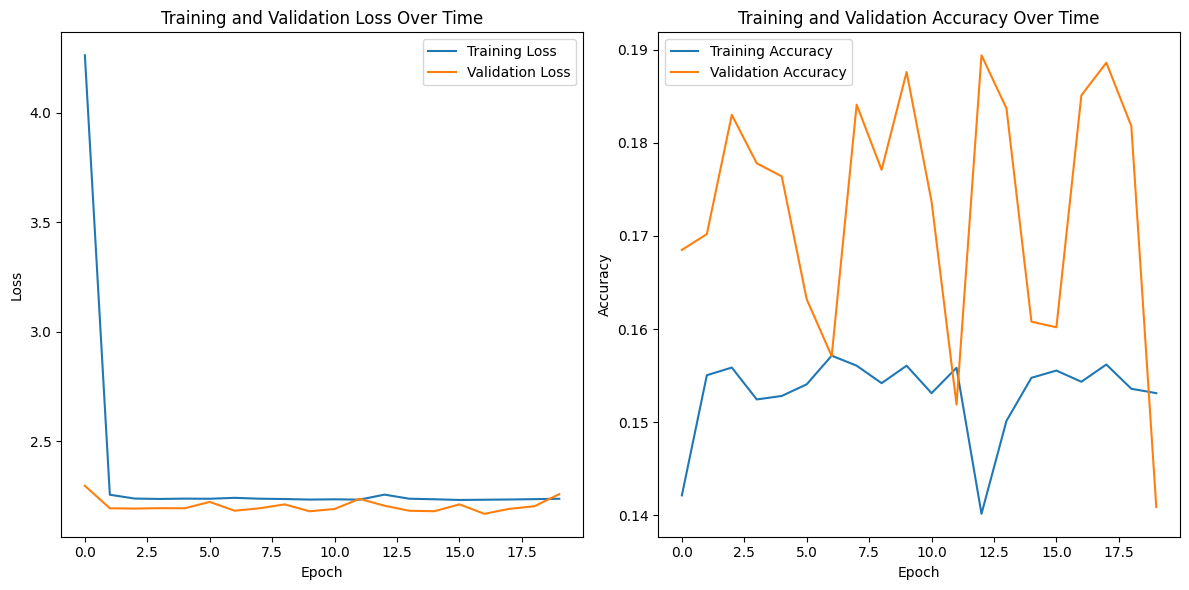

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, regularizers

# Step 1: Data Preparation
(train_images, train_labels), (test_images,
                               test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

# Step 2: Initialize the Network with Kaiming Initialization, L2, and Dropout
model_kaiming = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(512, activation='relu', kernel_initializer='he_normal',
                 kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.5),
    layers.Dense(256, activation='relu', kernel_initializer='he_normal',
                 kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu', kernel_initializer='he_normal',
                 kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax', kernel_initializer='he_normal',
                 kernel_regularizer=regularizers.l2(0.01))
])

# Step 3: Compile the Model
model_kaiming.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

# Step 4: Training
history_kaiming = model_kaiming.fit(train_images, train_labels,
                                    epochs=20, batch_size=32, validation_split=0.2)

# Step 5: Testing
test_loss_kaiming, test_acc_kaiming = model_kaiming.evaluate(test_images, test_labels)
print(f"Kaiming Initialization - Test accuracy: {test_acc_kaiming}")

# Step 6: Printing Results
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
predictions = model.predict(test_images)
plt.figure(figsize=(15, 6))  # Adjust the figsize as needed
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(test_images[i])
    plt.title(f"True: {class_names[test_labels[i][0]]}\nPredicted:
                      {class_names[np.argmax(predictions[i])]}")
    plt.axis("off")
plt.show()

# Step 5: Plotting Graphs
plt.figure(figsize=(12, 6))
# Plot Training Accuracy
plt.subplot(1, 2, 2)
plt.plot(history_kaiming.history['accuracy'], label='Training Accuracy')
plt.plot(history_kaiming.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy Over Time')
# Plot Training Loss
plt.subplot(1, 2, 1)
plt.plot(history_kaiming.history['loss'], label='Training Loss')
plt.plot(history_kaiming.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss Over Time')
plt.tight_layout()  # Ensures proper spacing between subplots
plt.show()